In [7]:
import pandas as pd


In [8]:
import numpy as np 


In [9]:
import nltk


In [10]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


In [12]:
df = pd.read_csv("D:\\New folder\\games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [13]:
df = df[1:].reset_index(drop=True)



In [14]:
df.drop('Movies',axis=1,inplace=True)


In [15]:
df.columns[0]


'AppID'

In [16]:
len(df.columns)

38

In [17]:
df.head(5)


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots
0,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...
1,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...
3,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...
4,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,0,Feel tired of auto-fight? Feel tired of boring...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://7.wan.com,https://wartune@7road.com,True,False,False,0,NaN,0,87,49,NaN,0,0,NaN,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...


In [18]:
corr_columns = ['Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Unnamed']

df.rename(columns=dict(zip(df.columns[:7], corr_columns)), inplace=True)

In [19]:
df.head()


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Unnamed,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots
0,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...
1,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...
3,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...
4,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,0,Feel tired of auto-fight? Feel tired of boring...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://7.wan.com,https://wartune@7road.com,True,False,False,0,NaN,0,87,49,NaN,0,0,NaN,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...


In [20]:
df['year'] = df['Release date'].str.extract(r'(\d{4})')


In [21]:
data = df[['Name','Tags','About the game','year','Header image',"Categories"]]
data.head(3)

,Name,Tags,About the game,year,Header image,Categories
0,Train Bandit,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",THE LAW!! Looks to be a showdown atop a train....,2017,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements,Full controll..."
1,Jolt Project,NaN,Jolt Project: The army now has a new robotics ...,2021,https://cdn.akamai.steamstatic.com/steam/apps/...,Single-player
2,Henosis™,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",HENOSIS™ is a mysterious 2D Platform Puzzler w...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Full controller support"


<Axes: xlabel='year'>

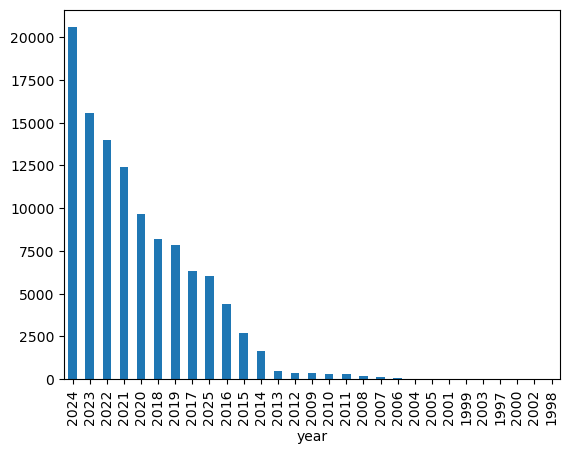

In [22]:
data['year'].value_counts().plot(kind='bar')


In [23]:
data['year'] = data['year'].astype(int)


In [24]:
data = data[data['year'] > 2018]


In [25]:
data.shape


(86021, 6)

<Axes: >

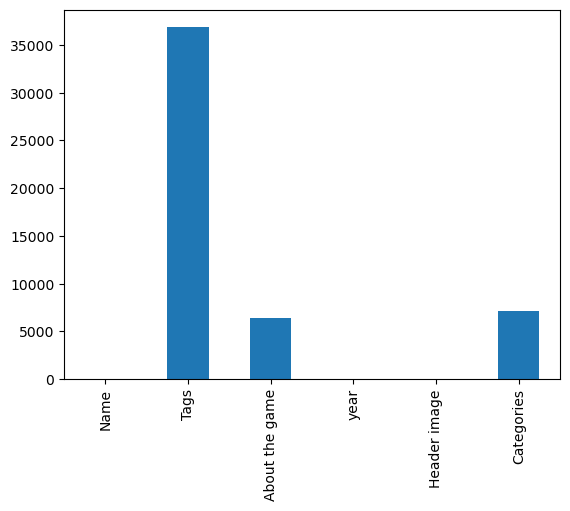

In [26]:
data.isna().sum().plot(kind='bar')


In [27]:
data.dropna(axis=0,inplace=True)


<Axes: >

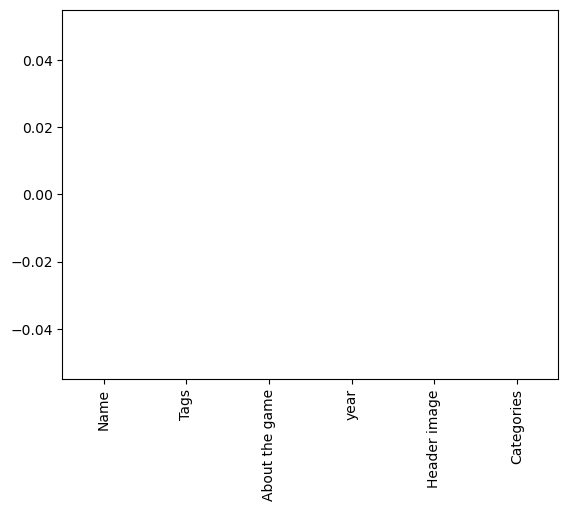

In [28]:
data.isna().sum().plot(kind='bar')


In [29]:
data.head()


,Name,Tags,About the game,year,Header image,Categories
2,Henosis™,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",HENOSIS™ is a mysterious 2D Platform Puzzler w...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Full controller support"
3,Two Weeks in Painland,"Indie,Adventure,Nudity,Violent,Sexual Content,...",ABOUT THE GAME Play as a hacker who has arrang...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements"
4,Wartune Reborn,"Turn-Based Combat,Massively Multiplayer,Multip...",Feel tired of auto-fight? Feel tired of boring...,2021,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Multi-player,MMO,PvP,Online PvP,..."
5,TD Worlds,"Tower Defense,Rogue-lite,RTS,Replay Value,Perm...","TD Worlds is a dynamic, highly strategical gam...",2022,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements,Steam Cloud"
7,MazM: Jekyll and Hyde,"Adventure,Simulation,RPG,Strategy,Singleplayer...",'MazM: Jekyll and Hyde' is a darkly entertaini...,2020,https://cdn.akamai.steamstatic.com/steam/apps/...,"Single-player,Steam Achievements,Full controll..."


In [30]:
data.drop_duplicates(inplace=True)


In [31]:
data.reset_index(drop=True,inplace=True)


In [32]:
data['Name'] = data['Name'].str.replace(r'[^a-zA-Z0-9\s]','',regex=True).str.strip().str.lower()

In [33]:
data['About the game'] = data['About the game'].str.replace(r'[^a-zA-Z\s]','',regex=True).str.strip().str.lower()

In [34]:
data['About the game']


0        henosis is a mysterious d platform puzzler whe...
1        about the game play as a hacker who has arrang...
2        feel tired of autofight feel tired of boring n...
3        td worlds is a dynamic highly strategical game...
4        mazm jekyll and hyde is a darkly entertaining ...
                               ...                        
48542    pax augusta  the ultimate ancient citybuilding...
48543    mandragora whispers of the witch tree is a dar...
48544    welcome to starry trace  a relaxing yet braint...
48545    you stand at the edge of time trying to save t...
48546    story  andrei moved to moscow for work and ren...
Name: About the game, Length: 48547, dtype: object

In [35]:
data.columns


Index(['Name', 'Tags', 'About the game', 'year', 'Header image', 'Categories'], dtype='object')

Processing

In [36]:
data['Tags'] = data['Tags'].apply(
    lambda x: set(x.lower().split()) if isinstance(x, str) else set(map(str.lower, x))
)

In [37]:
data['Tags'][:3]


0    {platformer,atmospheric,surreal,mystery,puzzle...
1    {rich, indie,adventure,nudity,violent,sexual, ...
2    {turn-based, game,strategy,2.5d,magic,medieval...
Name: Tags, dtype: object

In [38]:
data = data.iloc[:43500]

In [39]:
data['combined'] = data['Name']+' '+data["Categories"]


In [40]:
vectorizer = TfidfVectorizer(stop_words='english')
games_vector = vectorizer.fit_transform(data['combined'])

In [41]:
data.shape


(43500, 7)

In [42]:
from scipy.sparse import csr_matrix
from tqdm.auto import tqdm

# Convert to a sparse matrix if not already
games_vector_sparse = csr_matrix(games_vector)

# Get number of rows correctly
num_rows = games_vector_sparse.shape[0]  

chunk_size = 900
num_chunks = (num_rows // chunk_size)   

# Initialize similarity matrix
sim_matrix = np.zeros((num_rows, num_rows))

# Compute cosine similarity in chunks
for i in tqdm(range(num_chunks), desc="Computing Cosine Similarity"):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, num_rows)  
    
    chunk_sim = cosine_similarity(games_vector_sparse[start:end], games_vector_sparse)
    
    sim_matrix[start:end, :] = chunk_sim  

Computing Cosine Similarity:   0%|          | 0/48 [00:00<?, ?it/s]

In [43]:
pip install TheFuzz


Note: you may need to restart the kernel to use updated packages.


In [44]:
from thefuzz  import process


In [45]:
def correct_name(title,threshold=80):
    game_names = data['Name'].tolist()
    best_match,score = process.extractOne(title,game_names)

    if score >= threshold :
        return best_match 
    else  : 
        return None

In [46]:
# testing 
correct_name('balck mansion')

'black mansion'

In [49]:
import numpy as np
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection/union if union !=0 else 0

def recommend_game(title, n_recommendation=5, alpha=0.3):
    # Normalize input title and dataset titles
    title = title.lower().strip()
    data['Name'] = data['Name'].str.lower().str.strip()

    # Check if the title exists in the dataset
    if title not in data['Name'].values:
        corr_title = correct_name(title)
        if corr_title in data['Name'].values:
            title = corr_title
        else:
            return "Game not found. Please check the name and try again."

    # Find the index of the given game title
    g_idx = data[data['Name'] == title].index[0]
    jaccard_scores = []

    # Compute Jaccard similarity scores
    for idx in range(len(data)):
        if idx == g_idx:
            jaccard_scores.append(0)
        else:
            jaccard_scores.append(jaccard_similarity(data.loc[g_idx, 'Tags'], data.loc[idx, 'Tags']))

    jaccard_scores = np.array(jaccard_scores)

    # Normalize the scores
    if np.max(jaccard_scores) > 0:
        jaccard_scores /= np.max(jaccard_scores)

    # Get cosine similarity scores
    cosine_scores = sim_matrix[g_idx]
    if np.max(cosine_scores) > 0:
        cosine_scores /= np.max(cosine_scores)

    # Combine both scores
    final_score = alpha * cosine_scores + (1 - alpha) * jaccard_scores
    recomm_idx = final_score.argsort()[::-1][1:n_recommendation+1]  # Fix indexing

    similar_games = data.iloc[recomm_idx]['Name'].tolist()
    output = f"**Recommended games for '{title}':**\n\n"
    game_list = []
    for idx in recomm_idx:
            game_name = data['Name'].iloc[idx]  # Get the game name
            game_image = data['Header image'].iloc[idx]  # Get the image URL
            game_list.append((game_image, game_name))

    
    return output, game_list

In [75]:
title = 'need for speed unbound'
recommend_game(title)

("**Recommended games for 'need for speed unbound':**\n\n",
 [('https://cdn.akamai.steamstatic.com/steam/apps/1551360/header.jpg?t=1658260306',
   'forza horizon 5'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1293830/header.jpg?t=1622068013',
   'forza horizon 4'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1222680/header.jpg?t=1649949359',
   'need for speed heat'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1591870/header.jpg?t=1639281773',
   'drift phonk 666'),
  ('https://cdn.akamai.steamstatic.com/steam/apps/1675100/header.jpg?t=1639281716',
   'ae86 eurobeat drift')])